<a href="https://colab.research.google.com/github/JohanCala/Eighth-Semester/blob/main/AnaliticaDeDatosEInteligenicaArtificialModulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este es una breve intro a colab  
Se va a trabajar con series temporales  
Se va a trabajar con tematica de medicina, con la enfermedad de las aritmias  
link base de datos: https://www.physionet.org/content/mitdb/1.0.0/  
construir un modelo supervisado  
wfdb solo se usa para leer y sacar las categorias, no se usa para nada mas  
tenemos que formar la base de datos  
la tarea de esta semana es formar la base de datos  
frecuencia de muestreo: es cuantas muestras esta tomando por segundo  
la frecuencia de muestreo tiene que ser dos veces la frecuencia del fenomeno o serie

los numeros de las señales es la amplitud de la señal y los numeros del ATR son muestras  

In [1]:
pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 5.2 MB/s 


[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]
360


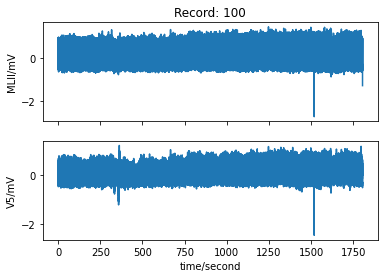

In [2]:
import wfdb 

pepito = wfdb.rdrecord("db/100")
print(pepito)

signal = pepito.p_signal  #varible temporal, porque no sirve siempre tenerla en la memoria
print(signal)
fs = pepito.fs
print(fs)

wfdb.plot_wfdb(pepito)

361.1111111111111
[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]


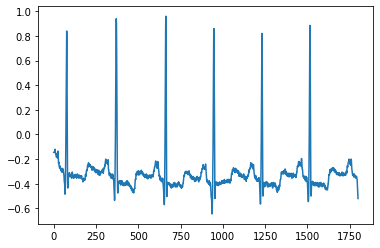

In [3]:
FS = len(signal)/1800
print(FS)
print(signal)
signal1 = signal[:,0]
signal2 = signal[:,1]

import matplotlib.pyplot as plt

plt.plot(signal1[0:1800])

Es la presencia del latido cardiaco

In [4]:
ann = wfdb.rdann('db/100','atr') #etiquetas del evento
print(ann)

ANN = ann.sample
print(ANN)
len(ANN)
len(signal1)

[    18     77    370 ... 649484 649734 649991]


650000

Extraer la dinamica del latido, utilizando el ANN

si se dan varias etiqutas las señales son tomadas en diferentes momentos en el tiempo

en series temporales necesito dinamicas.  


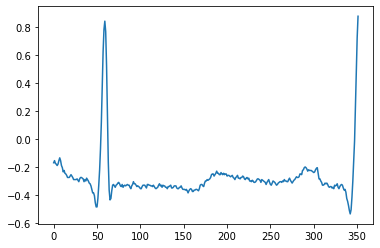

In [8]:
N = 82 # centro de la ventana
REGISTRO1 = signal1[ANN[4]-N:ANN[4]+N]
plt.plot(signal1[ANN[0]:ANN[2]])

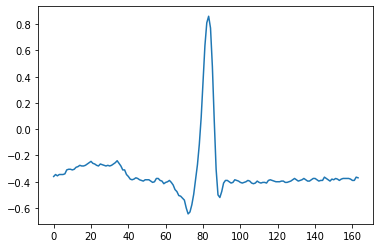

In [9]:
plt.plot(REGISTRO1)

In [25]:
import pandas as pd
import numpy as np

In [26]:
#CrearDataSet

#Vobser = signal1[ANN[1]-70: ANN[1]+70]
ListaI=[]
signal1=signal[:,0]
for i in ANN:
  
  Vboser=0

  if i==649875:
    Vboser=signal1[i-32:]
  else:
    Vboser=signal1[i-16:i+16]
  ListaI.append(Vboser)



colums = np.arange(0,len(ListaI[0]),1)
lst = ListaI
df = pd.DataFrame(lst, columns = colums)
df


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,-0.145,-0.150,...,-0.155,-0.135,-0.155,-0.190,-0.205,-0.235,-0.225,-0.245,-0.250,-0.260
1,-0.335,-0.360,-0.385,-0.385,-0.405,-0.455,-0.485,-0.485,-0.425,-0.330,...,-0.435,-0.425,-0.370,-0.330,-0.325,-0.335,-0.345,-0.330,-0.325,-0.315
2,-0.360,-0.380,-0.425,-0.445,-0.475,-0.510,-0.535,-0.505,-0.415,-0.300,...,-0.270,-0.390,-0.450,-0.475,-0.455,-0.425,-0.390,-0.390,-0.385,-0.390
3,-0.390,-0.405,-0.410,-0.435,-0.465,-0.490,-0.520,-0.555,-0.570,-0.525,...,-0.500,-0.505,-0.445,-0.415,-0.395,-0.390,-0.395,-0.390,-0.395,-0.405
4,-0.475,-0.505,-0.510,-0.525,-0.540,-0.600,-0.645,-0.630,-0.575,-0.495,...,-0.500,-0.520,-0.475,-0.410,-0.390,-0.390,-0.400,-0.410,-0.405,-0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,-0.310,-0.320,-0.340,-0.370,-0.420,-0.460,-0.470,-0.505,-0.525,-0.485,...,-0.545,-0.475,-0.390,-0.355,-0.360,-0.365,-0.370,-0.360,-0.345,-0.340
2270,-0.355,-0.365,-0.415,-0.465,-0.470,-0.485,-0.525,-0.555,-0.525,-0.420,...,-0.550,-0.500,-0.430,-0.395,-0.395,-0.405,-0.390,-0.380,-0.370,-0.370
2271,-0.355,-0.370,-0.410,-0.450,-0.490,-0.505,-0.540,-0.595,-0.565,-0.475,...,-0.550,-0.545,-0.465,-0.405,-0.380,-0.390,-0.385,-0.370,-0.370,-0.370
2272,-0.415,-0.435,-0.465,-0.520,-0.530,-0.570,-0.595,-0.615,-0.575,-0.475,...,-0.585,-0.545,-0.485,-0.445,-0.430,-0.445,-0.445,-0.440,-0.430,-0.430


Sacar lo que no es un latido

primero se saca lo que es 

2 registros 100 segundos

In [ ]:
print(type(signal1), signal1)

<class 'numpy.ndarray'> [-0.145 -0.145 -0.145 ... -0.675 -0.765 -1.28 ]


In [ ]:
ms = []
ds = []
for index in range(0, len(signal1), 5):
  chunk = signal1[index : index + 10]
  m = chunk.mean()
  d = chunk.std()
  ms += [m] * (10 if index == 0 else 5)
  ds += [d] * (10 if index == 0 else 5)

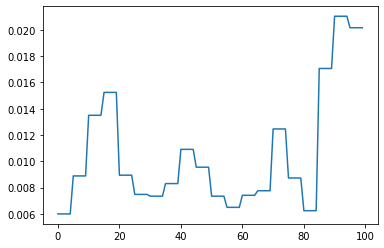

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ds[100:200])
#plt.plot(ms)